# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [8]:
new_cols = [col.lower() for col in df.columns]
#set equal to df.columns if you want the change to take place
new_cols

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

## Change the Index to be the Line Names

In [9]:
#Your code here
# df = df.set_index('LINENAME')
# df.head()
df = df.set_index('LINENAME')
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [10]:
# Your code here
df = df.reset_index() #Not that painful
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [36]:
# Your code here
dd = df.groupby('STATION').LINENAME.nunique()
dd.sort_values(axis = 0, ascending = False, inplace = True )
dd = pd.DataFrame(dd)
dd.columns = ['Num_Lines']
dd.head()

,Num_Lines
STATION,
86 ST,4
23 ST,4
125 ST,4
CANAL ST,3
BAY PKWY,3


## Write a function to clean a column name

In [7]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.

## Compare subway traffic by day of the week. Display this as a graph.

Index(['entries', 'exits', 'Num_Lines'], dtype='object')

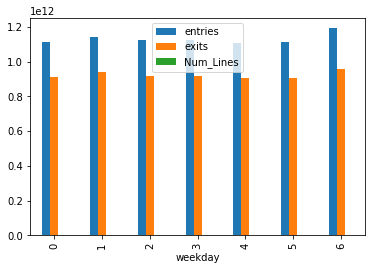

In [38]:
#Your code here
df.date = pd.to_datetime(df.date)
df['weekday'] = df.date.dt.dayofweek
grouped = df.groupby('weekday').sum()
grouped.plot(kind = "bar")
grouped.columns

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [48]:
#Your code here
grouped['IsWeekend'] = grouped['weekday'].map({0:'workday',1:'workday',2:'workday',3:'workday',
                                               4:'workday',5:'weekend',6:'weekend'})
wkend = grouped.groupby('IsWeekend').mean()


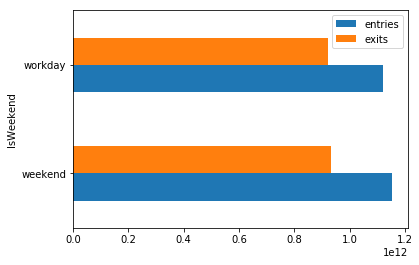

In [49]:
wkend[['entries', 'exits']].plot(kind='barh')

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.